# LAB | Feature Engineering

**Load the data**

In this challenge, we will be working with the same Spaceship Titanic data, like the previous Lab. The data can be found here:

https://raw.githubusercontent.com/data-bootcamp-v4/data/main/spaceship_titanic.csv

Metadata

https://github.com/data-bootcamp-v4/data/blob/main/spaceship_titanic.md

In [16]:
#Libraries
import pandas as pd
import numpy as np
from sklearn.datasets import  fetch_california_housing
import pandas as pd
import numpy as np
from dfply import *

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor

from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.model_selection import train_test_split

In [17]:
spaceship = pd.read_csv("https://raw.githubusercontent.com/data-bootcamp-v4/data/main/spaceship_titanic.csv")
spaceship.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


**Check the shape of your data**

In [18]:
#your code here
spaceship.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


**Check for data types**

In [19]:
#your code here
spaceship.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


**Check for missing values**

In [20]:
#your code here
spaceship_null = spaceship.isnull().sum()
spaceship_null_percent = round(spaceship.isnull().sum()/len(spaceship)*100,2)

# Create DataFrames for count and percentage

spaceship_null_pd = pd.DataFrame(spaceship_null, columns=['Missing Values Count'])
spaceship_null_percent_pd = pd.DataFrame(spaceship_null_percent, columns=['Missing Values Percentage'])

# Concatenate DataFrames
missing_values_df = pd.concat([spaceship_null_pd, spaceship_null_percent_pd], axis=1)

print("DataFrame with count and percentage of missing values:")
print(missing_values_df)

DataFrame with count and percentage of missing values:
              Missing Values Count  Missing Values Percentage
PassengerId                      0                       0.00
HomePlanet                     201                       2.31
CryoSleep                      217                       2.50
Cabin                          199                       2.29
Destination                    182                       2.09
Age                            179                       2.06
VIP                            203                       2.34
RoomService                    181                       2.08
FoodCourt                      183                       2.11
ShoppingMall                   208                       2.39
Spa                            183                       2.11
VRDeck                         188                       2.16
Name                           200                       2.30
Transported                      0                       0.00


There are multiple strategies to handle missing data

- Removing all rows or all columns containing missing data.
- Filling all missing values with a value (mean in continouos or mode in categorical for example).
- Filling all missing values with an algorithm.

For this exercise, because we have such low amount of null values, we will drop rows containing any missing value. 

In [21]:
#your code here
spaceship.dropna(inplace=True)

In [22]:
spaceship['VIP'] = spaceship['VIP'].astype(int)
spaceship['CryoSleep']= spaceship['CryoSleep'].astype(int)
spaceship['Transported']= spaceship['Transported'].astype(int)



- **Cabin** is too granular - transform it in order to obtain {'A', 'B', 'C', 'D', 'E', 'F', 'G', 'T'}

In [23]:
#your code here
spaceship['Cabin'] = spaceship['Cabin'].str[:1]
spaceship.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,0,B,TRAPPIST-1e,39.0,0,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,0
1,0002_01,Earth,0,F,TRAPPIST-1e,24.0,0,109.0,9.0,25.0,549.0,44.0,Juanna Vines,1
2,0003_01,Europa,0,A,TRAPPIST-1e,58.0,1,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,0
3,0003_02,Europa,0,A,TRAPPIST-1e,33.0,0,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,0
4,0004_01,Earth,0,F,TRAPPIST-1e,16.0,0,303.0,70.0,151.0,565.0,2.0,Willy Santantines,1


- Drop PassengerId and Name

In [24]:
#your code here
spaceship.drop(columns=['PassengerId','Name'], inplace=True)

- For non-numerical columns, do dummies.

In [25]:
#your code here
#List the unique values
unique_home_planet = spaceship['HomePlanet'].unique()
unique_home_planet





array(['Europa', 'Earth', 'Mars'], dtype=object)

In [26]:
#loop to create dummy columns
#create a dictionary to store the dummy variables for each column separately,
dummy_dict = {}

for column in spaceship.columns:
    if spaceship[column].dtype == 'object':
        dummies = pd.get_dummies(spaceship[column], prefix=f'is_{column}')
        dummy_dict[column] = dummies
        spaceship.drop(columns=column, inplace=True)

spaceship_dummy = pd.concat(dummy_dict.values(), axis=1)
        

In [27]:
spaceship_with_dummies = pd.concat([spaceship, spaceship_dummy], axis=1)
spaceship_with_dummies.head()

,CryoSleep,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,is_HomePlanet_Earth,...,is_Cabin_B,is_Cabin_C,is_Cabin_D,is_Cabin_E,is_Cabin_F,is_Cabin_G,is_Cabin_T,is_Destination_55 Cancri e,is_Destination_PSO J318.5-22,is_Destination_TRAPPIST-1e
0,0,39.0,0,0.0,0.0,0.0,0.0,0.0,0,0,...,1,0,0,0,0,0,0,0,0,1
1,0,24.0,0,109.0,9.0,25.0,549.0,44.0,1,1,...,0,0,0,0,1,0,0,0,0,1
2,0,58.0,1,43.0,3576.0,0.0,6715.0,49.0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,0,33.0,0,0.0,1283.0,371.0,3329.0,193.0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,0,16.0,0,303.0,70.0,151.0,565.0,2.0,1,1,...,0,0,0,0,1,0,0,0,0,1


In [28]:
column_names = spaceship_with_dummies.columns.tolist()
print(column_names)

['CryoSleep', 'Age', 'VIP', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck', 'Transported', 'is_HomePlanet_Earth', 'is_HomePlanet_Europa', 'is_HomePlanet_Mars', 'is_Cabin_A', 'is_Cabin_B', 'is_Cabin_C', 'is_Cabin_D', 'is_Cabin_E', 'is_Cabin_F', 'is_Cabin_G', 'is_Cabin_T', 'is_Destination_55 Cancri e', 'is_Destination_PSO J318.5-22', 'is_Destination_TRAPPIST-1e']


In [29]:
spaceship_with_dummies.dtypes

CryoSleep                         int64
Age                             float64
VIP                               int64
RoomService                     float64
FoodCourt                       float64
ShoppingMall                    float64
Spa                             float64
VRDeck                          float64
Transported                       int64
is_HomePlanet_Earth               uint8
is_HomePlanet_Europa              uint8
is_HomePlanet_Mars                uint8
is_Cabin_A                        uint8
is_Cabin_B                        uint8
is_Cabin_C                        uint8
is_Cabin_D                        uint8
is_Cabin_E                        uint8
is_Cabin_F                        uint8
is_Cabin_G                        uint8
is_Cabin_T                        uint8
is_Destination_55 Cancri e        uint8
is_Destination_PSO J318.5-22      uint8
is_Destination_TRAPPIST-1e        uint8
dtype: object

In [30]:
spaceship_with_dummies.drop(columns=['is_HomePlanet_Earth','is_Cabin_A','is_Destination_55 Cancri e'], inplace=True)

**Perform Train Test Split**

In [31]:
#your code here
train = spaceship_with_dummies.drop(columns=['Transported'])
target = spaceship_with_dummies['Transported']

**Model Selection**

In this exercise we will be using **KNN** as our predictive model.

In [32]:
#your code here
X_train, X_test, y_train, y_test = train_test_split(train, target, test_size=0.20, random_state=0)

In [33]:
#normalization
normalizer = MinMaxScaler()
normalizer.fit(X_train)

MinMaxScaler()

In [34]:
X_train_norm = normalizer.transform(X_train)
X_test_norm = normalizer.transform(X_test)
X_train_norm = pd.DataFrame(X_train_norm, columns = X_train.columns)
X_train_norm.head()

,CryoSleep,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,is_HomePlanet_Europa,is_HomePlanet_Mars,is_Cabin_B,is_Cabin_C,is_Cabin_D,is_Cabin_E,is_Cabin_F,is_Cabin_G,is_Cabin_T,is_Destination_PSO J318.5-22,is_Destination_TRAPPIST-1e
0,1.0,0.405063,0.0,0.00000,0.000000,0.000000,0.000000,0.000000,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
1,1.0,0.050633,0.0,0.00000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
2,0.0,0.379747,0.0,0.00000,0.007916,0.000000,0.051276,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
3,0.0,0.215190,0.0,0.00131,0.000000,0.046111,0.016378,0.000049,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
4,1.0,0.329114,0.0,0.00000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0


- Evaluate your model's performance. Comment it

In [35]:
#your code here
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(X_train_norm, y_train)
knn.score(X_test_norm, y_test)

/Users/martinoalonso/Library/Python/3.9/lib/python/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


0.762481089258699

In [36]:
pred = knn.predict(X_test_norm)
pred

/Users/martinoalonso/Library/Python/3.9/lib/python/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


array([1, 1, 1, ..., 1, 1, 1])

In [40]:
from sklearn.metrics import precision_score, recall_score, f1_score
precision_score(y_test, pred,average='micro')



0.762481089258699

<Axes: >

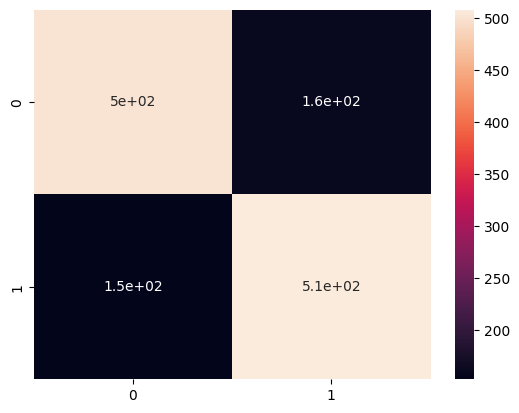

In [41]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
sns.heatmap(confusion_matrix(y_test, pred), annot=True)

In [42]:
print(confusion_matrix(y_test,pred))

[[500 161]
 [153 508]]


In [43]:
from sklearn.metrics import classification_report

print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.77      0.76      0.76       661
           1       0.76      0.77      0.76       661

    accuracy                           0.76      1322
   macro avg       0.76      0.76      0.76      1322
weighted avg       0.76      0.76      0.76      1322



In [44]:
print(precision_score(y_test,pred))
print(recall_score(y_test,pred))
#rate of false positive is still higher than false negative, but
#the difference is smaller than in the previous lab. 

0.7593423019431988
0.7685325264750378


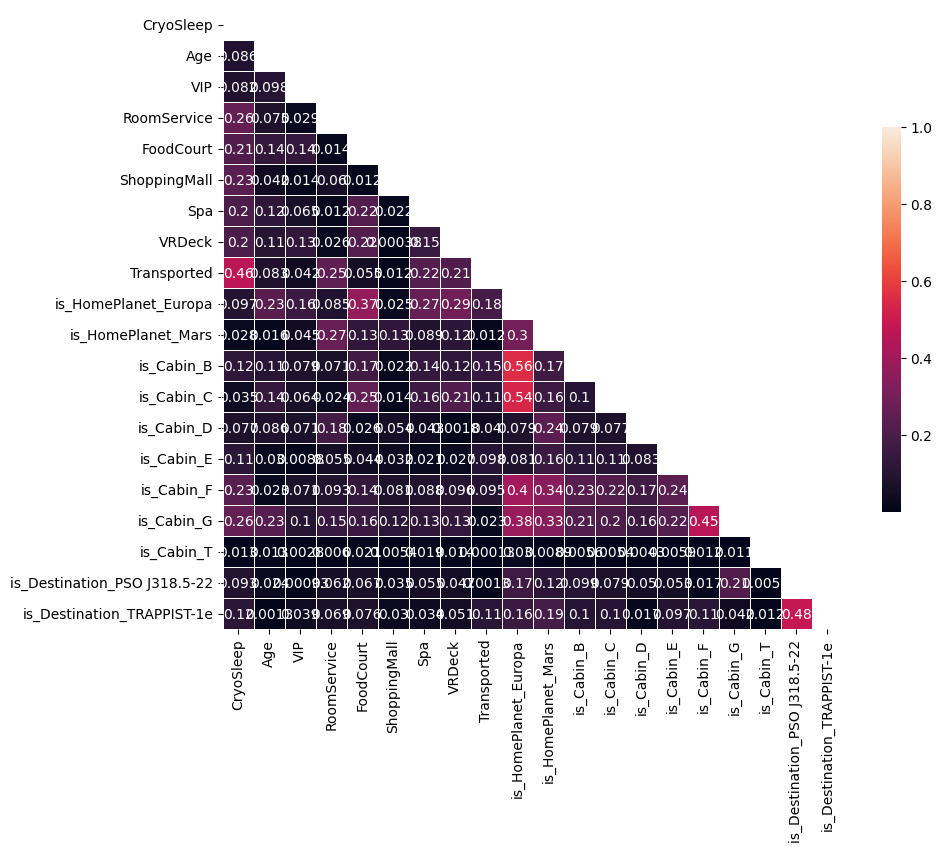

In [45]:
#This should be done with 

# corr=np.abs(spaceship_with_dummies.corr())

# #Set up mask for triangle representation
# mask = np.zeros_like(corr, dtype=bool)
# mask[np.triu_indices_from(mask)] = True

# # Set up the matplotlib figure
# f, ax = plt.subplots(figsize=(10, 10))
# # Generate a custom diverging colormap
# cmap = sns.diverging_palette(220, 10, as_cmap=True)
# # Draw the heatmap with the mask and correct aspect ratio
# sns.heatmap(corr, mask=mask,  vmax=1,square=True, linewidths=.5, cbar_kws={"shrink": .5},annot = corr)

# plt.show()